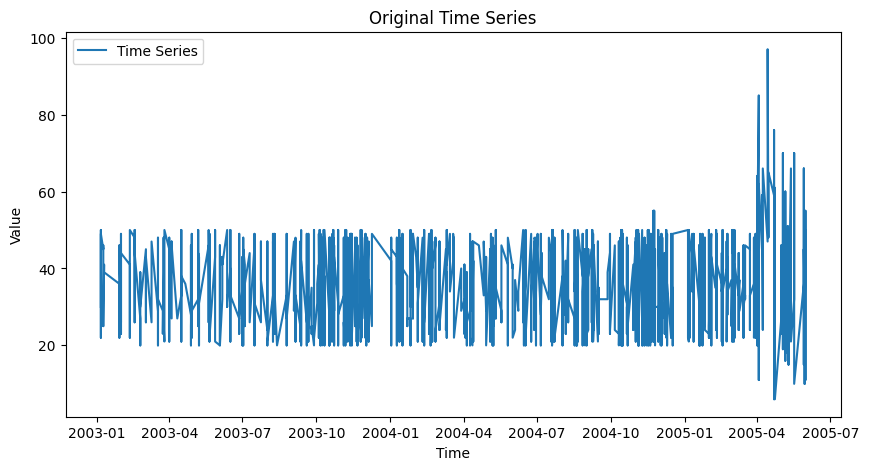

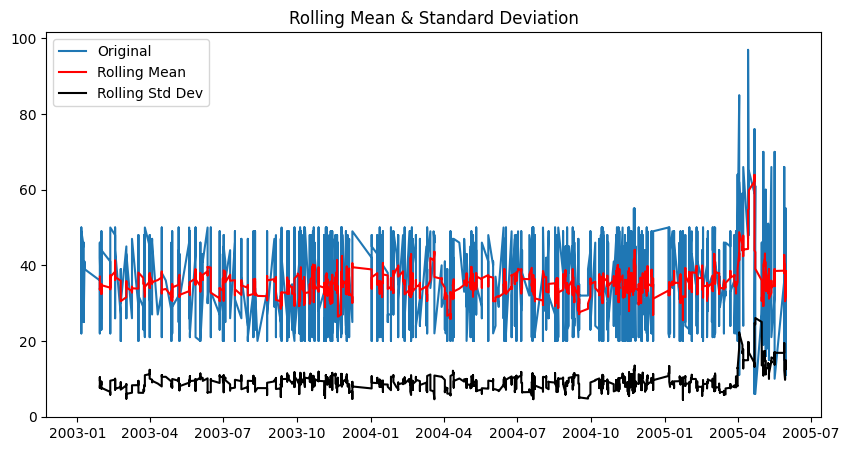

ADF Test:
Test Statistic: -10.500403503575816
p-value: 1.0877620296223442e-18
Critical Values: {'1%': -3.432682605940669, '5%': -2.862570582321741, '10%': -2.5673186105021872}
The series is likely stationary.
KPSS Test:
Test Statistic: 0.9947391403047415
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is likely non-stationary.


<ipython-input-3-7048ead51c73>:63: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna(), regression='c')


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss

# Load the dataset, specifying the encoding
df = pd.read_csv('/content/sales_data_sample.csv', encoding='latin1')

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
df = df.dropna(subset=['date'])  # Drop rows with invalid dates

df.set_index('date', inplace=True)
df = df.sort_index()

# Select the time series column
time_series = df['QUANTITYORDERED']

# Plot the time series
def plot_series(series, title='Time Series'):
    plt.figure(figsize=(10, 5))
    plt.plot(series, label='Time Series')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

plot_series(time_series, title='Original Time Series')

# Rolling statistics
def rolling_statistics(series, window=12):
    rolling_mean = series.rolling(window=window).mean()
    rolling_std = series.rolling(window=window).std()

    plt.figure(figsize=(10, 5))
    plt.plot(series, label='Original')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std Dev', color='black')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

rolling_statistics(time_series)

# Augmented Dickey-Fuller Test
def adf_test(series):
    result = adfuller(series.dropna())
    print("ADF Test:")
    print(f"Test Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    if result[1] < 0.05:
        print("The series is likely stationary.")
    else:
        print("The series is likely non-stationary.")

adf_test(time_series)

# KPSS Test
def kpss_test(series):
    result = kpss(series.dropna(), regression='c')
    print("KPSS Test:")
    print(f"Test Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[3]}")
    if result[1] < 0.05:
        print("The series is likely non-stationary.")
    else:
        print("The series is likely stationary.")

kpss_test(time_series)

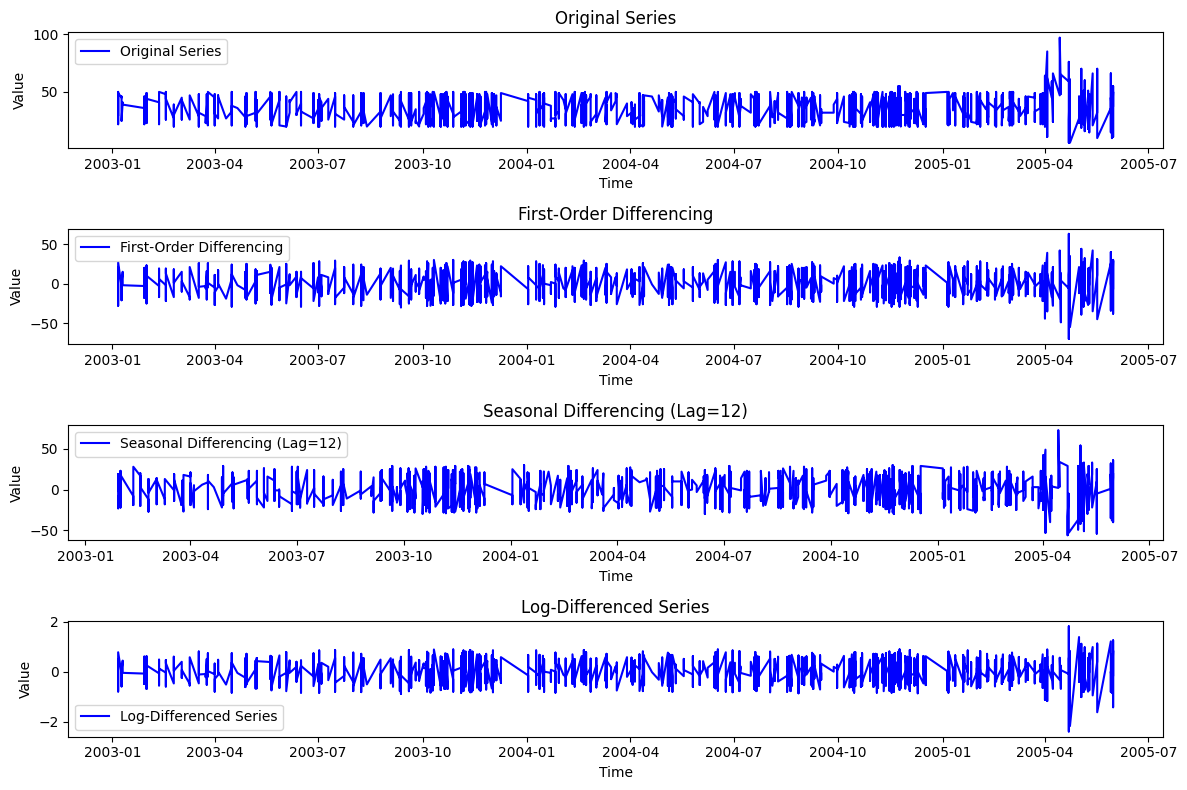

In [4]:
import matplotlib.pyplot as plt

# Function to plot multiple time series in subplots
def plot_multiple_series(series_list, titles, figsize=(12, 8)):
    plt.figure(figsize=figsize)
    for i, (series, title) in enumerate(zip(series_list, titles)):
        plt.subplot(len(series_list), 1, i + 1)
        plt.plot(series, label=title, color='b')
        plt.title(title)
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.legend()
    plt.tight_layout()
    plt.show()

# Applying transformations
df['diff_1'] = df['QUANTITYORDERED'].diff()
df['diff_seasonal'] = df['QUANTITYORDERED'].diff(12)
df['log_transformed'] = np.log1p(df['QUANTITYORDERED'])
df['log_diff'] = df['log_transformed'].diff()

# Visualize transformations
plot_multiple_series(
    [df['QUANTITYORDERED'], df['diff_1'], df['diff_seasonal'], df['log_diff']],
    ['Original Series', 'First-Order Differencing', 'Seasonal Differencing (Lag=12)', 'Log-Differenced Series']
)
